# 📝 Exercise M2.01

The aim of this exercise is to make the following experiments:

* train and test a support vector machine classifier through
  cross-validation;
* study the effect of the parameter gamma of this classifier using a
  validation curve;
* use a learning curve to determine the usefulness of adding new
  samples in the dataset when building a classifier.

To make these experiments we will first load the blood transfusion dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

We will use a support vector machine classifier (SVM). In its most simple
form, a SVM classifier is a linear classifier behaving similarly to a
logistic regression. Indeed, the optimization used to find the optimal
weights of the linear model are different but we don't need to know these
details for the exercise.

Also, this classifier can become more flexible/expressive by using a
so-called kernel that makes the model become non-linear. Again, no requirement
regarding the mathematics is required to accomplish this exercise.

We will use an RBF kernel where a parameter `gamma` allows to tune the
flexibility of the model.

First let's create a predictive pipeline made of:

* a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  with default parameter;
* a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
  where the parameter `kernel` could be set to `"rbf"`. Note that this is the
  default.

In [58]:
# Write your code here.
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
svc = SVC(kernel='rbf')



Evaluate the generalization performance of your model by cross-validation with a
`ShuffleSplit` scheme. Thus, you can use
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
and pass a [`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
to the `cv` parameter. Only fix the `random_state=0` in the `ShuffleSplit`
and let the other parameters to the default.

In [60]:
for i in range(1, 10):
    ts = i / 10
    print("\n Test size: ", ts)
    ss = ShuffleSplit(random_state = 0, test_size = ts)
    svc = SVC(kernel='rbf')
    print(cross_validate(svc, data, target, cv = ss)['test_score'])


 Test size:  0.1
[0.68       0.74666667 0.76       0.81333333 0.73333333 0.77333333
 0.77333333 0.8        0.77333333 0.74666667]

 Test size:  0.2
[0.72666667 0.74       0.78       0.78       0.71333333 0.77333333
 0.74       0.82666667 0.76       0.79333333]

 Test size:  0.3
[0.72888889 0.75555556 0.78222222 0.73333333 0.75111111 0.76444444
 0.76       0.79111111 0.73777778 0.77777778]

 Test size:  0.4
[0.75333333 0.74666667 0.76666667 0.74666667 0.77666667 0.77333333
 0.77       0.78       0.75       0.79      ]

 Test size:  0.5
[0.76203209 0.74331551 0.76203209 0.76203209 0.75935829 0.77005348
 0.7513369  0.77540107 0.7513369  0.78877005]

 Test size:  0.6
[0.76614699 0.76614699 0.76391982 0.74610245 0.75501114 0.76837416
 0.75501114 0.76614699 0.76614699 0.77060134]

 Test size:  0.7
[0.75954198 0.75954198 0.77480916 0.74618321 0.75954198 0.76335878
 0.76335878 0.75572519 0.75572519 0.76717557]

 Test size:  0.8
[0.76794658 0.76293823 0.77462437 0.75959933 0.76293823 0.7629382

PODEMOS VER QUE CON CROSS VALID ALEATORIO VARIANDOLO DE 10 EN 10 DESDE EL 10 AL 90 SACAMOS RESULTADOS SIMILARES. LO CUAL ME ESCAMA. SÍ QUE ES VERDAD QUE HE COMPRADO SI ES POSIBLE HACIENDO LAS PARTICIONES SIN ALEATORIERDAD Y A MANO Y RÁPIDAMENTE SE SATURA EN PERFORMANCE:

In [61]:
import numpy as np

for i in range(1, 10):
    s = int(data.shape[0] * i/10)
    x_train, y_train = data[0:s], target[0:s]
    x_test, y_test = data[s:], target[s:]
    print(f" Train sample {i*10}% Total shape {data.shape[0]}  and train-test shapes {x_train.shape, x_test.shape}")
    svc = SVC(kernel='rbf')
    svc.fit(x_train, y_train)
    print(f"% of accuracy ==> {np.round(sum(svc.predict(x_test) == y_test) / y_test.shape[0] *100, 2)}%")
    print(" ")

 Train sample 10% Total shape 748  and train-test shapes ((74, 4), (674, 4))
% of accuracy ==> 20.33%
 
 Train sample 20% Total shape 748  and train-test shapes ((149, 4), (599, 4))
% of accuracy ==> 81.47%
 
 Train sample 30% Total shape 748  and train-test shapes ((224, 4), (524, 4))
% of accuracy ==> 82.06%
 
 Train sample 40% Total shape 748  and train-test shapes ((299, 4), (449, 4))
% of accuracy ==> 82.63%
 
 Train sample 50% Total shape 748  and train-test shapes ((374, 4), (374, 4))
% of accuracy ==> 82.09%
 
 Train sample 60% Total shape 748  and train-test shapes ((448, 4), (300, 4))
% of accuracy ==> 79.0%
 
 Train sample 70% Total shape 748  and train-test shapes ((523, 4), (225, 4))
% of accuracy ==> 80.44%
 
 Train sample 80% Total shape 748  and train-test shapes ((598, 4), (150, 4))
% of accuracy ==> 90.67%
 
 Train sample 90% Total shape 748  and train-test shapes ((673, 4), (75, 4))
% of accuracy ==> 93.33%
 


In [74]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SVC())

print(" Por default se utiliza un 10% del dataset como test")
cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(model, data, target, cv=cv, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
cv_results

 Por default se utiliza un 10% del dataset como test


,fit_time,score_time,test_score
0,0.022602,0.003109,0.680000
1,0.020779,0.002960,0.746667
2,0.020460,0.004738,0.786667
3,0.019511,0.002913,0.800000
4,0.020061,0.002882,0.746667
5,0.018230,0.005692,0.786667
6,0.025802,0.003544,0.800000
7,0.024041,0.002939,0.826667
8,0.018233,0.002877,0.746667
9,0.018304,0.002945,0.733333


In [75]:
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} +/- "
    f"{cv_results['test_score'].std():.3f}"
)

Accuracy score of our model:
0.765 +/- 0.043


As previously mentioned, the parameter `gamma` is one of the parameters
controlling under/over-fitting in support vector machine with an RBF kernel.

Evaluate the effect of the parameter `gamma` by using the
[`sklearn.model_selection.validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) function.
You can leave the default `scoring=None` which is equivalent to
`scoring="accuracy"` for classification problems. You can vary `gamma`
between `10e-3` and `10e2` by generating samples on a logarithmic scale
with the help of `np.logspace(-3, 2, num=30)`.

Since we are manipulating a `Pipeline` the parameter name will be set to
`svc__gamma` instead of only `gamma`. You can retrieve the parameter name
using `model.get_params().keys()`. We will go more into detail regarding
accessing and setting hyperparameter in the next section.

In [76]:
# Write your code here.
# solution
import numpy as np
from sklearn.model_selection import validation_curve

gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=gammas, cv=cv,
    n_jobs=2)

Plot the validation curve for the train and test scores.

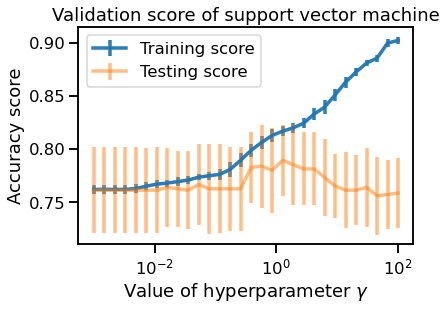

In [77]:
# Write your code here.
# solution
import matplotlib.pyplot as plt

plt.errorbar(
    gammas,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    alpha=0.95,
    label="Training score",
)
plt.errorbar(
    gammas,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    alpha=0.5,
    label="Testing score",
)
plt.legend()

plt.xscale("log")
plt.xlabel(r"Value of hyperparameter $\gamma$")
plt.ylabel("Accuracy score")
_ = plt.title("Validation score of support vector machine")


Now, you can perform an analysis to check whether adding new samples to the
dataset could help our model to better generalize. Compute the learning curve
(using [`sklearn.model_selection.learning_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html))
by computing the train and test scores for different training dataset size.
Plot the train and test scores with respect to the number of samples.

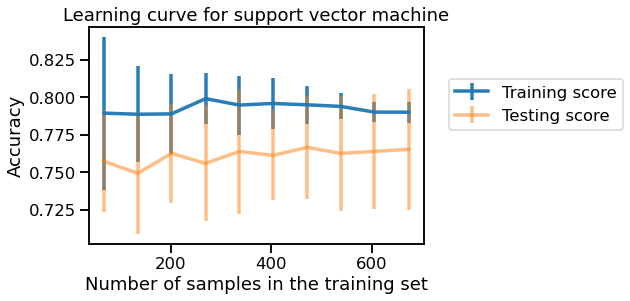

In [78]:
# Write your code here.

# solution
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1, num=10)
results = learning_curve(
    model, data, target, train_sizes=train_sizes, cv=cv, n_jobs=2)
train_size, train_scores, test_scores = results[:3]

plt.errorbar(
    train_size,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    alpha=0.95,
    label="Training score",
)
plt.errorbar(
    train_size,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    alpha=0.5,
    label="Testing score",
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")

plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")
_ = plt.title("Learning curve for support vector machine")